한국어 Word2Vec 만들기(네이버 뉴스)

한국어 Word2Vec 만들기(네이버 뉴스)

한국어 Word2Vec 만들기(네이버 뉴스)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import re
from eunjeon import Mecab

In [3]:
정상기업 = pd.read_csv('./data/정상기업뉴스21.csv')
# 정상기업 = pd.read_csv('./data/정상기업뉴스.csv')


In [4]:
data=정상기업
# data=pd.concat([상폐기업, 정상기업], axis = 0)
# data=pd.concat([상폐기업, 정상기업], axis = 0)

In [5]:
# data.drop(["Unnamed: 0"],inplace=True,axis=1)
data

,기업,기사발행일,기사제목,뉴스기사본문
0,(주)천보,2020.12.17. 오전 9:55,[특징주] '2차전지 관련주' 천보 상승세… 6%↑,사진=천보\n\n천보가 장 초반 상승세다.\n\n17일 오전 9시52분 기준 천보는...
1,(주)천보,2020.09.21. 오전 9:31,"[특징주] 천보, 증권가 장밋빛 전망 속 52주 신고가 경신",[서울경제] 전해질 생산업체 천보(278280)가 증권가 애널리스트들의 긍정적인 전...
2,(주)천보,2020.09.21. 오전 10:56,"[TF특징주] 2차전지 관련주 '천보', 성장 기대감에 강세",21일 오전 10시 40분 현재 천보는 전일대비 1만6200원(+8.93%) 오른 ...
3,(주)천보,2020.09.21. 오전 9:43,"[특징주] 천보, 투자 확대에 11% 급등",천보 로고\n천보가 투자 확대로 성장이 기대되면서 급등했다.\n\n천보는 21일 오...
4,(주)천보,2020.08.28. 오전 9:47,"[특징주]천보, 52주 신고가…배터리 수요 증가 기대",[이데일리 박정수 기자] 천보(278280)가 52주 신고가를 경신했다. 배터리 수...
5,(주)천보,2020.07.31. 오전 9:42,"[특징주] 천보, 설비 투자 계획 발표에 10%↑",사진=천보\n천보가 대규모 생산능력 증설 공시에 장 초반 상승세다.\n\n31일 천...
6,(주)천보,2020.07.30. 오후 5:42,"[특징주] 천보, 전기차용 배터리 시설 투자 공시에 12%↑ 마감",사진=천보\n천보가 부진한 실적에도 시설 투자 공시가 호재로 작용해 급등 마감했다....
7,(주)천보,2020.05.30. 오전 8:01,"'사상 최고가' 천보, 전기차 모멘텀 타고 '훨훨'",글로벌 경기 둔화에도 전기차주 상승세. 천보 상장 후 최고가(9만7900원) 경신\...
8,(주)천보,2020.11.06. 오전 9:19,美 대선 승리 임박한 바이든…2차전지株도 연일 '강세',[머니투데이 김영상 기자] [[특징주]]\n\n6일 서울 용산구 서울역에서 시민들이...
9,(주)천보,2020.08.31. 오전 6:57,[김대성의 종목분석] 주가가 올들어 2배 이상 오른 종목들을 살펴보면?,코로나19 수혜주와 2차전지 관련주의 주가 상승률 두드러져\n씨젠 주가 상승률 69...


In [6]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [7]:
# 형태소 분석기 mecab를 사용한 토큰화 작업 (다소 시간 소요)

mecab = Mecab()
tokenized_data = []
output=[]
for sentence in data['뉴스기사본문전처리']:
    temp_X = mecab.nouns(sentence)  # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거

    tokenized_data.append(temp_X)


KeyError: '뉴스기사본문전처리'

한글자제거

In [10]:
remove_one_word=[]
for j in range(len(tokenized_data)):
    a=[x for x in tokenized_data[j] if len(x)>1]
    remove_one_word.append(a)
    

In [11]:
remove_one_word

[['휠라',
  '남자',
  '펜싱',
  '인방',
  '퍼포먼스',
  '히어로즈',
  '화보',
  '공개',
  '휠라',
  '대한민국',
  '남자',
  '펜싱',
  '사브르',
  '대표',
  '인방',
  '촬영',
  '퍼포먼스',
  '히어로즈',
  '화보',
  '공개',
  '사진',
  '제공',
  '휠라',
  '도쿄',
  '올림픽',
  '올림픽',
  '디펜',
  '챔피언',
  '타이틀',
  '획득',
  '대한민국',
  '남자',
  '펜싱',
  '사브르',
  '대표',
  '인방',
  '휠라',
  '파워',
  '매력',
  '휠라',
  '오상욱',
  '김준호',
  '구본길',
  '김정환',
  '선수',
  '구성',
  '대한민국',
  '남자',
  '펜싱',
  '사브르',
  '대표',
  '인방',
  '퍼포먼스',
  '히어로즈',
  '화보',
  '공개',
  '올림픽',
  '감동',
  '가운데',
  '영웅',
  '컨셉',
  '바탕',
  '도쿄',
  '올림픽',
  '금메달',
  '연패',
  '주인공',
  '인방',
  '펜싱',
  '매력',
  '표현',
  '선수',
  '휠라',
  '퍼포먼스',
  '러닝',
  '휠라',
  '뉴런',
  '운동력',
  '향상',
  '도움',
  '기능',
  '소재',
  '패커',
  '경량',
  '재킷',
  '스트레치',
  '후디',
  '트랙',
  '퍼포먼스',
  '전용',
  '의류',
  '착용',
  '펜싱',
  '동작',
  '응용',
  '역동',
  '포즈',
  '카리스마',
  '표정',
  '경기력',
  '외모',
  '펜싱',
  '별칭',
  '인방',
  '화보',
  '매거진',
  '맨즈',
  '헬스',
  '확인',
  '가능',
  '휠라',
  '대한민국',
  '남자',
  '펜싱',
  '사브르',
  '대표',
  '인방',
  '촬영',
  '퍼포먼스'

In [12]:
len(remove_one_word)
list_text_1=sum(remove_one_word, [])

In [13]:
word=pd.DataFrame(list_text_1)
word
# word.to_csv("word2vec_word.csv",encoding="utf-8-sig")

,0
0,휠라
1,남자
2,펜싱
3,인방
4,퍼포먼스
...,...
19936,투데이
19937,무단
19938,전재
19939,배포


In [14]:
from collections import Counter

In [15]:
횟수=Counter(list_text_1)
횟수['폐지']
# for i in range(len(list_text_1)):
    
# print(Counter(list_text_1))

135

기사의 길이 및 분포 확인

기사의 최대 길이 : 1674
기사의 평균 길이 : 192.2016129032258


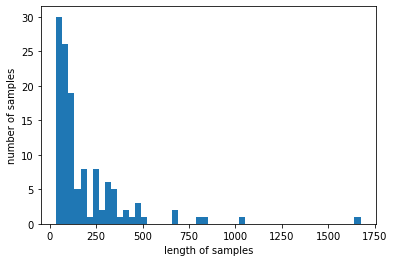

In [16]:
# 기사 길이 분포 확인

print('기사의 최대 길이 :',max(len(l) for l in tokenized_data))
print('기사의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show();

word2vec훈련

In [17]:
# Word2Vec 훈련시키기

from gensim.models import Word2Vec # 
model = Word2Vec(sentences = remove_one_word, window = 5, min_count = 5, workers = 4, sg = 1, )

In [18]:
# 완성된 임베딩 매트릭스의 크기 확인

model.wv.vectors.shape

(825, 100)

유사도확인

In [23]:
print(model.wv.most_similar(["폐지"],topn=10))
dataframe_1=model.wv.most_similar(["폐지"],topn=10)
dataframe=pd.DataFrame(dataframe_1)
dataframe.columns=['단어','유사도']
dataframe

[('상장', 0.9968788623809814), ('심사', 0.9899392127990723), ('사유', 0.9849392771720886), ('거래소', 0.9806902408599854), ('실질', 0.9804936051368713), ('격성', 0.9784388542175293), ('위원회', 0.9777184128761292), ('여부', 0.9739099144935608), ('제출', 0.9722899198532104), ('정지', 0.9670040607452393)]


,단어,유사도
0,상장,0.996879
1,심사,0.989939
2,사유,0.984939
3,거래소,0.980690
4,실질,0.980494
5,격성,0.978439
6,위원회,0.977718
7,여부,0.973910
8,제출,0.972290
9,정지,0.967004


In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [22]:
data['뉴스기사본문전처리']

0      휠라 남자 펜싱 인방의 퍼포먼스 히어로즈 화보 공개휠라가 대한민국 남자 펜싱 사브르...
1      휠라는 대한민국 남자 펜싱 사브르 대표팀 인방이 매거진 맨즈헬스와 함께한 퍼포먼스 ...
2       앵커멘트 한우 하면 황토색을 띤 소가 떠오르시죠.그런데 고구려 벽화부터 조선 말까...
3       한국거래소 코스닥시장본부는 일 코스닥시장위원회를 통해 이엠네트웍스의 주권에 대해 ...
4      오는 월일까지 조사기간계속기업가치 입증 거래재개 가능 여부 관심 라임 사태 연루자들...
                             ...                        
119     미래는 지난해 월 일 결정했던 억원 규모의 제자배정 유상증자를 미발행 처리하기로 ...
120    미래은 제이더블유중외아이엔에셋 및 특별관계자의 지분율이 에서 .로 변동했다고 일 공...
121    한국거래소는 코스닥 상장기업인 미래에 대해 월 일부터 상장적격성 실질심사 대상여부에...
122    미래은 요즈마그룹코리아 및 특별관계자의 지분율이 .에서 .로 변동했다고 일 공시했다...
123    미래는 사업 다각화를 통해 시너지 효과를 창출하기 위해 어린이 급식 관리 지원 회사...
Name: 뉴스기사본문전처리, Length: 124, dtype: object

뉴스기사 레이블 시키기

In [24]:
plor=["폐지","퇴출","기로","벼랑"]
a="|".join(plor)
df=data[data['뉴스기사본문전처리'].str.contains(a)]
df

,기업,기사발행일,기사제목,뉴스기사본문전처리
3,이엠네트웍스,2021.06.28. 오후 6:12,"거래소, 이엠네트웍스 상장폐지 결정",한국거래소 코스닥시장본부는 일 코스닥시장위원회를 통해 이엠네트웍스의 주권에 대해 ...
4,이엠네트웍스,2021.02.23. 오전 10:19,"‘라임 무자본 M&A’ 이엠네트웍스, 회생절차 개시",오는 월일까지 조사기간계속기업가치 입증 거래재개 가능 여부 관심 라임 사태 연루자들...
5,이엠네트웍스,2020.10.30. 오후 5:11,"에스모 머티리얼즈, 상호명 '이엠네트웍스'로 변경",에스모 머티리얼즈는 상호명을 이엠네트웍스로 변경하기로 했다고 일 공시했다.에스모 ...
7,이엠네트웍스,2021.02.17. 오전 11:52,연이은 적자로 '관리종목·상장폐지 위기' 코스닥 기업 30여곳,실적 부진 우려 기업에는 투자 주의해야황진환 기자실적 부진으로 관리종목이나 상장폐지...
8,이엠네트웍스,2021.02.17. 오전 7:04,[e공시 눈에 띄네]코스닥-16일,장 마감 후 주요 공시멕아이씨에스유상증자 최종 발행가액 만원 확정위세아이텍보통주 주...
9,이엠네트웍스,2021.02.16. 오전 11:26,결산시즌...코스닥 적자기업 비상,관리종목 개사 상장 폐지 관심...한국정밀기계 등 퇴출위기코스피가 전 거래일보다 ....
14,코너스톤네트웍스,2021.01.27. 오전 7:30,[e공시 눈에 띄네]코스닥-26일,지와이커머스 지와이커머스 삼원트레이드를 흡수합병비츠로시스 증권거래소 기업심사위원회서...
17,코너스톤네트웍스,2020.08.19. 오전 1:01,"코로나19 후폭풍?… 반기 `의견거절` 코스닥社, 2배 `쑥`",코로나 타격으로 의견거절 보고서 개사 달해경남바이오파마시큐브 개 이날 하한가 마감관...
18,에이아이비트,2021.06.03. 오후 3:15,거래소 “에이아이비트 정리매매 보류”,한국거래소 코스닥시장본부는 에이아이비트에 대해 상장폐지사유가 발생함에 따라 지난 ...
21,에이아이비트,2020.08.23. 오후 5:47,"‘거래정지’ 에이아이비트, 경영권 분쟁까지 ‘설상가상’",의견거절로 지난 월부터 매매거래가 정지된 코스닥 상장사 에이아이비트가 현 최대주주 ...


s